### Objective
* Create a Class with different repeatable methods for ATP Data Analysis

In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split 

In [2]:
class AtpAnalysis:
    
    def __init__(self):
        self.data = pd.read_csv("/Users/mason/Desktop/Data_Science_Projects/ATP/grand_slam_data_clean.csv", index_col = 0)
        #self.modelallmatchesbyplayer = ModelAllMatchesByPlayer()
    
        
    def filter_by_player(self, player_name):
        data = self.data
        player_data = data[data['name'] == str(player_name)]
        print(f'{str(player_name)} has {len(player_data)} matches recorded') 
        return player_data
    
    def head_to_head(self, player1, player2):
        data = self.data
        head_to_head_data = data[(data['name'] == str(player1)) & (data['Opponent'] == str(player2))]
        print(f'Head to Head: {str(player1)} has played {str(player2)} {len(head_to_head_data)} times')
        return head_to_head_data
    
    def match_summary(self, matches):
        summary_columns = ['tourney_name','tourney_year', 'name', 'ioc', 'rank', 'score','minutes', 'win_outcome',
                          'seed', 'age','rank_points', 'aces', 'double_fault', 'svpt', '1stIn', '1stWon','2ndWon', 
                           'SvGms', 'bpSaved', 'bpFaced']
        matchsummary = matches[summary_columns]
        return matchsummary
    
            
            
    class PredictiveModelsByPlayer:
        def __init__(self, player_name, features, target, testing_size):
                
            self.data = AtpAnalysis().filter_by_player(player_name)
            self.playername = player_name
            self.features = features
            self.target = target
            self.test_size = testing_size
                
            #Split into training and testing for predictions 
            self.xTrain, self.xTest, self.yTrain, self.yTest = train_test_split(self.data[features], self.data[target], test_size = testing_size, random_state = 747)
            print(f'Training set size: {len(self.xTrain)} | Testing set size : {len(self.xTest)}')  
            
        def random_forest(self, estimators, **kw):
            #Create a Gaussian Classifier
            rf_model=RandomForestClassifier(n_estimators=estimators, criterion='entropy')
            #Train the model
            rf_model.fit(self.xTrain,self.yTrain)

            #Predict
            target_prediction=rf_model.predict(self.xTest)

            #Accuracy
            print("Accuracy:",metrics.accuracy_score(self.yTest, target_prediction))
                
            #Prediction
            if ('optional' in kw):
                prediction = rf_model.predict([kw['optional']])
                if prediction == 1: 
                    print(f'Prediction: Win')
                else:
                    print(f'Prediction: Loss')
            else:
                pass
            
        
            #Feature Importance
            self.feature_importance = pd.Series(rf_model.feature_importances_,index=features).sort_values(ascending=False)

            #Plot Feature Importance
            plt.bar(self.feature_importance.index,self.feature_importance)
            plt.xticks(rotation=90)
            plt.xlabel('Features')
            plt.ylabel('Feature Importance')
            plt.show()
            
        #def MORE MODELS HERE 
        

In [3]:
#Define Class
x = AtpAnalysis()

### Filtered By Player
Analysis for Roger Federer over all matches played

In [4]:
x.filter_by_player('Roger Federer').describe()

Roger Federer has 365 matches recorded


,minutes,seed,hand,opp_hand,height,age,rank,rank_points,aces,double_fault,...,win_outcome,tourney_year,tourney_month,tourney_day,seeded,bp_delta,ace_df_delta,surface_Clay,surface_Grass,surface_Hard
count,347.000000,365.000000,365.0,365.000000,365.0,365.000000,365.000000,365.000000,365.000000,365.000000,...,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,129.608069,2.736986,0.0,0.117808,185.0,27.256887,5.304110,6874.627397,10.326027,2.120548,...,0.860274,2008.473973,4.898630,23.123288,0.945205,1.747945,8.205479,0.219178,0.263014,0.517808
std,43.769321,3.393898,0.0,0.322823,0.0,4.502716,11.907293,2874.282339,5.773710,2.115287,...,0.347178,4.514629,2.617171,5.046338,0.227891,1.872891,5.915056,0.414257,0.440874,0.500369
min,54.000000,0.000000,0.0,0.000000,185.0,17.790554,1.000000,424.000000,0.000000,0.000000,...,0.000000,1999.000000,1.000000,13.000000,0.000000,0.000000,-7.000000,0.000000,0.000000,0.000000
25%,98.000000,1.000000,0.0,0.000000,185.0,23.865845,1.000000,5540.000000,7.000000,1.000000,...,1.000000,2005.000000,1.000000,19.000000,1.000000,0.000000,4.000000,0.000000,0.000000,0.000000
50%,119.000000,2.000000,0.0,0.000000,185.0,27.047228,2.000000,7215.000000,10.000000,1.000000,...,1.000000,2008.000000,6.000000,24.000000,1.000000,1.000000,7.000000,0.000000,0.000000,1.000000
75%,152.000000,3.000000,0.0,0.000000,185.0,30.880219,3.000000,9065.000000,13.000000,3.000000,...,1.000000,2012.000000,6.000000,27.000000,1.000000,3.000000,11.000000,0.000000,1.000000,1.000000
max,288.000000,17.000000,0.0,1.000000,185.0,35.441478,111.000000,12165.000000,50.000000,12.000000,...,1.000000,2017.000000,8.000000,31.000000,1.000000,9.000000,46.000000,1.000000,1.000000,1.000000


Roger Federer has 365 matches recorded
Random Forest Model and Predtion for on a(n) Average Day:
Roger Federer has 365 matches recorded
Training set size: 255 | Testing set size : 110
Accuracy: 0.8636363636363636
Prediction: Win


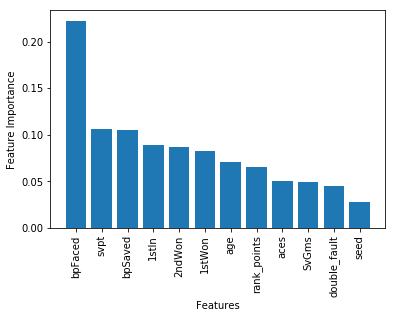

Random Forest Model and Predtion for on a(n) Above Average Day:
Roger Federer has 365 matches recorded
Training set size: 255 | Testing set size : 110
Accuracy: 0.8636363636363636
Prediction: Win


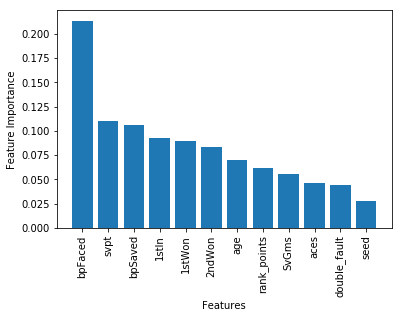

Random Forest Model and Predtion for on a(n) Below Average Day:
Roger Federer has 365 matches recorded
Training set size: 255 | Testing set size : 110
Accuracy: 0.8636363636363636
Prediction: Loss


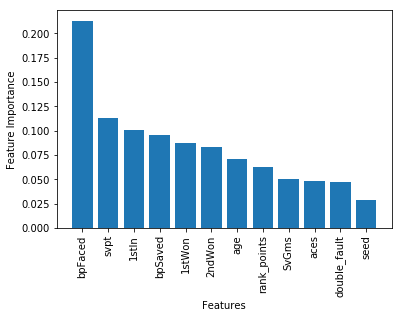

In [5]:
#Run Random Forest for Roger Federer
#Define Features
features = ['seed', 'age','rank_points', 'aces', 'double_fault', 'svpt', '1stIn', '1stWon',
       '2ndWon', 'SvGms', 'bpSaved', 'bpFaced']

#Define New Data for Prediction
#New data is representitive of an 'average day' for Roger Federer
#Federer Average Day
tmp = x.filter_by_player('Roger Federer')
c_features = ['seed', 'age','rank_points']
g_features = ['aces', 'svpt', '1stIn', '1stWon',
       '2ndWon', 'SvGms', 'bpSaved']
b_features = ['double_fault', 'bpFaced']
features = c_features+g_features+b_features


avg_data = [3,38,6950]
for feature in features[3:]:
    avg = tmp[feature].mean()
    avg_data.append(avg)

abv_avg = [3,38,6950]
for feature in g_features+b_features:
    if feature in g_features:
        pos = tmp[feature].mean()+(2*tmp[feature].std())
        abv_avg.append(pos)
    elif feature in b_features:
        neg = tmp[feature].mean()-(2*tmp[feature].std())
        abv_avg.append(neg)
    
blw_avg = [3,38,6950]
for feature in g_features+b_features:
    if feature in g_features:
        pos = tmp[feature].mean()-(2*tmp[feature].std())
        blw_avg.append(pos)
    elif feature in b_features:
        neg = tmp[feature].mean()+(2*tmp[feature].std())
        blw_avg.append(neg)

    
new_data = pd.DataFrame(index=features)
new_data['Average Day'] = avg_data
new_data['Above Average Day'] = abv_avg
new_data['Below Average Day'] = blw_avg



#Fit Random Forest
columns = ['Average Day', 'Above Average Day', 'Below Average Day']
for col in columns:
    print(f'Random Forest Model and Predtion for on a(n) {col}:')
    x.PredictiveModelsByPlayer('Roger Federer', features, 'win_outcome', .3).random_forest(400, optional = new_data[col])


### Head to Head Analysis

In [6]:
FedVNadal = x.head_to_head('Roger Federer', 'Rafael Nadal')
x.match_summary(FedVNadal).head(3)

Head to Head: Roger Federer has played Rafael Nadal 12 times


,tourney_name,tourney_year,name,ioc,rank,score,minutes,win_outcome,seed,age,rank_points,aces,double_fault,svpt,1stIn,1stWon,2ndWon,SvGms,bpSaved,bpFaced
131176,Wimbledon,2006,Roger Federer,SUI,1.0,6-0 7-6(5) 6-7(2) 6-3,178.0,1,1.0,24.881588,7260.0,13.0,1.0,119.0,83.0,64.0,20.0,20.0,1.0,3.0
135020,Wimbledon,2007,Roger Federer,SUI,1.0,7-6(7) 4-6 7-6(3) 2-6 6-2,225.0,1,1.0,25.878166,7290.0,24.0,3.0,156.0,111.0,79.0,28.0,25.0,7.0,11.0
163905,Australian Open,2017,Roger Federer,SUI,17.0,6-4 3-6 6-1 3-6 6-3,217.0,1,17.0,35.441478,1980.0,20.0,3.0,138.0,85.0,65.0,26.0,22.0,13.0,17.0


In [7]:
x.head_to_head('Roger Federer', 'Rafael Nadal').describe()

Head to Head: Roger Federer has played Rafael Nadal 12 times


,minutes,seed,hand,opp_hand,height,age,rank,rank_points,aces,double_fault,...,win_outcome,tourney_year,tourney_month,tourney_day,seeded,bp_delta,ace_df_delta,surface_Clay,surface_Grass,surface_Hard
count,12.000000,12.000000,12.0,12.0,12.0,12.000000,12.000000,12.000000,12.000000,12.000000,...,12.000000,12.000000,12.000000,12.000000,12.0,12.000000,12.000000,12.000000,12.000000,12.000000
mean,200.000000,3.166667,0.0,1.0,185.0,27.864933,3.166667,6890.833333,12.083333,2.416667,...,0.250000,2009.166667,3.916667,22.083333,1.0,5.250000,9.666667,0.416667,0.250000,0.333333
std,49.193496,4.608950,0.0,0.0,0.0,3.489786,4.608950,2118.839555,7.403419,1.975225,...,0.452267,3.639014,2.193309,5.071459,0.0,2.094365,7.463040,0.514929,0.452267,0.492366
min,108.000000,1.000000,0.0,1.0,185.0,23.789185,1.000000,1980.000000,2.000000,0.000000,...,0.000000,2005.000000,1.000000,13.000000,1.0,2.000000,-2.000000,0.000000,0.000000,0.000000
25%,175.250000,1.000000,0.0,1.0,185.0,25.571526,1.000000,6657.500000,8.000000,1.000000,...,0.000000,2006.750000,1.000000,18.250000,1.0,4.000000,5.750000,0.000000,0.000000,0.000000
50%,203.500000,1.000000,0.0,1.0,185.0,26.836413,1.000000,7135.000000,11.000000,1.500000,...,0.000000,2008.000000,5.000000,23.000000,1.0,4.000000,7.500000,0.000000,0.000000,0.000000
75%,222.750000,3.000000,0.0,1.0,185.0,29.950719,3.000000,7638.750000,14.750000,3.500000,...,0.250000,2011.250000,5.250000,25.250000,1.0,7.000000,13.250000,1.000000,0.250000,1.000000
max,288.000000,17.000000,0.0,1.0,185.0,35.441478,17.000000,10700.000000,25.000000,6.000000,...,1.000000,2017.000000,6.000000,29.000000,1.0,9.000000,23.000000,1.000000,1.000000,1.000000


***To Be Continued ...***